**SC 626 Systems and Control Laboratory (Part 3).**

---


---



Session 3 (Date: 06-04-2022 | Time: 2pm - 5pm)

*Name*: Sayan Ray

*Roll No.*: 213230011

# So we have been given the connected graph:

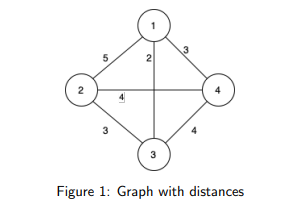

# What we need is the minimum distance traveresed using Simulated Annealing and Metropolis Hastings.

So taking the paths as states, example:

1-2-3-4-1 (assuming we started from node 1) is on e state and so 1-3-2-4-1 can be another.

# Code


---



Importing all the packages needed.

In [ ]:
import numpy as np

Initializing the variables.

In [ ]:
# I am declaring them global so as to preseve the changes done to these variables in the methods
global Tx_mat,s,c,trial,T,alpha

# The transition probability matrix
Tx_mat = [[0,5,2,3],[5,0,3,4],[2,3,0,4],[3,4,4,0]]
Tx_mat = np.array(Tx_mat)
print ("The transition probability matrix")
print(Tx_mat)

The transition probability matrix
[[0 5 2 3]
 [5 0 3 4]
 [2 3 0 4]
 [3 4 4 0]]


Now we need to define a cost function so that we can call whenver we want.

In [ ]:
def dist(s):
  # S we compute the total distance traversed by calculationg total ditance traversed if transition is in between adjacent elements
  total = 0
  for i in range(len(s)-1):
    row = s[i]
    col = s[i+1]
    total += Tx_mat[row,col]
  total += Tx_mat[ s[len(s)-1] , s[0] ]
  return total

We also need a a function to swap places so as to create neighbours.

In [ ]:
def swap(s, m, n):
  i = min(m, n)
  j = max(m, n)
  s1 = s.copy()
  while i < j:
    t = s1[j]
    s1[j] = s1[i]
    s1[i] = t
    i += 1
    j -= 1
  return s1

The main driving code

In [ ]:
# Declaring all the variables and contsnts we need in the code here itself
s = [0,1,2,3]
trial = 1
T = 100
# cooling rate of T
alpha = 0.9

# Taking an initial cost value
c = dist(s)

while trial <= 1000:
  # Now since we want to try different paths we will change by swapping elements between two indexes m and n
  while True:
    n = np.random.randint(0, 4)
    m = np.random.randint(0, 4)
    if n != m:
      break
  new_seq = swap(s, m, n)
  new_cost = dist(new_seq)

  if new_cost < c:
    # We difinitely shift to next point if there is smaller total distance (cost)
    s = new_seq
    c = new_cost
  else:
    # Else We shift to next point probabilistically
    if np.random.rand() < np.exp(-(new_cost - c)/T):
      s = new_seq
      c = new_cost
  T = alpha*T
  trial += 1

# Now we should get the best value
print ("Optimal Path :")
final = [x+1 for x in s]
print (final)
print ("Distance :"+str(c))


Optimal Path :
[2, 4, 1, 3]
Distance :12
